# Lab 7: Regression

## What you have to do

1. Pick a data set. You can choose one from [Kaggle](https://www.kaggle.com/), or [Data World](https://data.world/). Here are some examples:
    * [College Basketball](https://www.kaggle.com/andrewsundberg/college-basketball-dataset)
    * [College Football](https://www.kaggle.com/braydenrogowski/college-football-offensive-stats-20102020/)
    * [Car MPG](https://www.amac.xyz/courses/m240/labs/car_efficiency.csv)
    * [Area vs Price](https://www.amac.xyz/courses/m240/labs/area_price.csv)
2. Do a linear regression using the following three method:
    *  Minimizing the error with gradient descnet
    * Find the exact minimum by solving a linear system
    * Use the linear regression function from scipy/sklearn
3. Do a quadratic regression using any method you want
4. Predict 2 values


**To read the file use the following command:**

```python
import pandas as pd
df = pd.read_csv("car_efficiency.csv") # read the csv file and put the data into the data frame df
values = df.values # puit all the values of the data frame into an array values, where the first column is x and the second colum is y
x = values[:,0]
y = values[:,1]
```


In [16]:
#I picked the college football data set from the examples:

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci

In [2]:
#gradient descent method 

def GradientDescent(GradientF, a, x0, itmax, tolerance):
    for i in range (itmax):
        x1 = x0 - a*(GradientF(x0))
        if sci.norm(GradientF(x1)) < (tolerance):
            break
        x0 = x1
    return x1,i

In [3]:
import pandas as pd
df = pd.read_csv("College-Football.csv") # read the csv file and put the data into the data frame df
values = df.values # put it all the values of the data frame into an array values, where the first column is x and the second colum is y

In [4]:
x = values[:,3]
x = x[1:]
x = x.astype(float)
x

array([ 88., 123.,  83., ..., 135., 120.,  62.])

In [5]:
y = values[:,9]
y = y[1:]
y = y.astype(float)
y

array([12., 16.,  9., ...,  8., 11.,  1.])

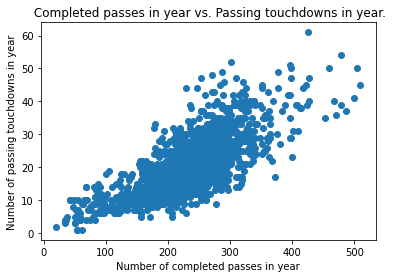

In [6]:
#graph of just data

plt.scatter(x,y)
plt.title(" Completed passes in year vs. Passing touchdowns in year.")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.show()

In [7]:
#The first problem using gradient descent

# a = 4 and b = 0.1

x0 = np.array([4, 0.1])

tolerance = 10E-6

N = len(x)


def GradientF(u):
    return np.array([(1/N)*np.sum([2*u[0]*(u[0]*x + u[1] - y)]),(1/N)*np.sum([2*(u[0]*x + u[1] - y)])])


def Er1(a,b):
    return ((1/N)*np.sum(a*x + b - y)**2)


descent, iteration = GradientDescent(GradientF, 0.0005, x0, 1000, tolerance)
print('A, B: ',descent)

print( '\nGradient Error: ', sci.norm(GradientF(descent)) ,',', 'iteration: ', iteration)

a = 0.09766832
b = -2.0520599

print('\nError: ', Er1(a, b) )


print('\nThe absolute value of the gradient error: ',np.abs(sci.norm(GradientF(descent))),' is less than the tolerance of: ',tolerance)
print("\nThe absolute value of the gradient error: 0.00000979499385137066 is less than the tolerance: 0.00001")

A, B:  [ 0.09766832 -2.0520599 ]

Gradient Error:  9.79499385137066e-06 , iteration:  624

Error:  4.87709248001001e-08

The absolute value of the gradient error:  9.79499385137066e-06  is less than the tolerance of:  1e-05

The absolute value of the gradient error: 0.00000979499385137066 is less than the tolerance: 0.00001


<function matplotlib.pyplot.show(close=None, block=None)>

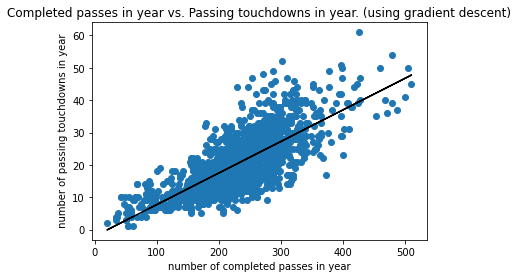

In [8]:
#graph for gradient descent

plt.scatter(x,y)
plt.plot(x,(descent[0]*x)+descent[1], 'k-')
plt.title("Completed passes in year vs. Passing touchdowns in year. (using gradient descent)")
plt.xlabel("number of completed passes in year")
plt.ylabel(" number of passing touchdowns in year")
plt.show

In [9]:
# The second problem using LU solve

In [10]:
A = np.array([[(1/N)*(np.sum(2*(x**2))),(1/N)*(np.sum(2*x))],[(1/N)*(np.sum(2*x)),(2)]])

b = np.array([[(1/N)*np.sum(2*x*y)],[(1/N)*np.sum(2*y)]])



g = sci.solve(A,b)



def Er2(g):
    return (1/N)*np.sum(g[0]*x + g[1] - y)**2

print('1:')
print('\na = ', g[0])
# print('Ax = ', np.dot(A,x))
print('\nb = ', g[1])
print( '\nGradient Error: ', sci.norm(GradientF(g)) ,',', 'iteration: ', iteration)
print("\nError: ", Er2(g))

1:

a =  [0.09340277]

b =  [-1.05474712]

Gradient Error:  1.4155792241466128e-15 , iteration:  624

Error:  6.806190695261964e-28


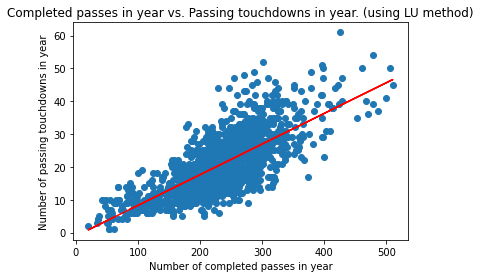

In [11]:
plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (using LU method)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.plot(x,(g[0]*x)+g[1],'r-')

LinregressResult(slope=0.09340276649600167, intercept=-1.0547471192809041, rvalue=0.7336517456971645, pvalue=3.888345470589118e-232, stderr=0.002337304842767402, intercept_stderr=0.5709722053879236)

A =  0.09340276649600167

b =  -1.0547471192809041

Gradient error:  1.8726943735017465e-15 , iteration:  624

The error is:  1.1922609133136226e-27


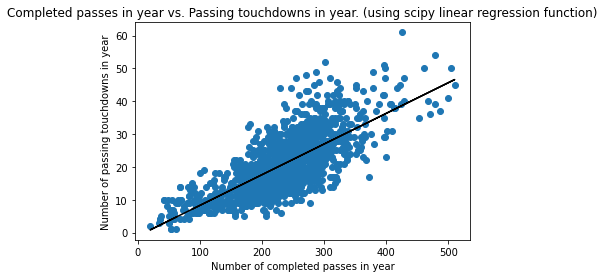

In [12]:
# This is for the third problem using the linear regression functino from scipy

import scipy.stats as stat


z=stat.stats.linregress(x,y)

print(z)

plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (using scipy linear regression function)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")

plt.plot(x,(z[0]*x)+z[1],'k-')


def Er3(z):
    return (1/N)*np.sum(z[0]*x + z[1] - y)**2



print('\nA = ',0.09340276649600167)
print('\nb = ',-1.0547471192809041)
print( '\nGradient error: ', sci.norm(GradientF(z)) ,',', 'iteration: ', iteration)

print('\nThe error is: ',Er3(z))

In [13]:
#This is for the fourth problem with quadratic regression using LU solve. I chose this for the any method we want option.: 

p = np.array([[(1/N)*np.sum(2*(x**4)),(1/N)*np.sum(2*(x**3)),(1/N)*np.sum(2*(x**2))],[(1/N)*np.sum(2*(x**3)),(1/N)*np.sum(2*(x**2)),(1/N)*np.sum(2*x)],[(1/N)*np.sum(2*(x**2)),(1/N)*np.sum(2*x),(1/N)*np.sum(2)]])
l = np.array([[(1/N)*np.sum(2*(x**2)*y)],[(1/N)*np.sum(2*x*y)],[(1/N)*np.sum(2*y)]])


k = sci.solve(p,l)


print('\na = ', k[0])
print('\nb = ', k[1])
print('\nc = ', k[2])

def Er4(j):
    return (1/N)*np.sum(j[0]*x**2 + j[1]*x + j[2] - y)**2


def GradientFQ(k):
    return np.array([(1/N)*np.sum(2*x**2*(k[2] + k[1]*x + k[0]*(x**2) - y)),(1/N)*np.sum(2*x*(k[2] + k[1]*x + k[0]*x**2 - y)),(1/N)*np.sum(2*(k[2] + k[1]*x + k[0]*x**2 - y))])



print( '\nGradient error: ', sci.norm(GradientFQ(k)) ,',', 'iteration: ', iteration)

print('\nThe error is: ', Er4(k))


a =  [3.03893914e-05]

b =  [0.08113528]

c =  [-0.04234162]

Gradient error:  0.084621512655627 , iteration:  624

The error is:  2.456154538615383


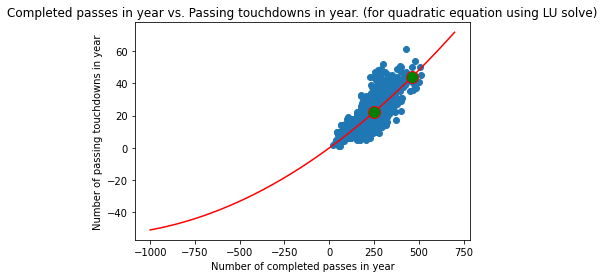

In [14]:
#graph for quadratic
x1=np.linspace(-1000,700,1000)
y1 = k[0]*x1**2 + k[1]*x1+k[2]
plt.scatter(x,y)
plt.title("Completed passes in year vs. Passing touchdowns in year. (for quadratic equation using LU solve)")
plt.xlabel("Number of completed passes in year")
plt.ylabel("Number of passing touchdowns in year")
plt.plot(x1,y1, 'r-')

#2 green markers are plotted on the quadratic regression graph. The x I chose and the plotted y coordinate for these
#green points are the predicted value that was the last instruction of the final. Calculations for predicted value are below
plt.plot(250, 22.140815342500005, marker="o", markersize=12, markeredgecolor="red", markerfacecolor="green")
plt.plot(460, 43.710282400240004, marker="o", markersize=12, markeredgecolor="red", markerfacecolor="green")

In [15]:
#predicting 2 values of that I ploted above (y)

a = 3.03893914e-05
b = 0.08113528
c = -0.04234162
x = 250

def predictor(a,b,c,x):
    y = a*(x**2) + b*x + c
    return y



print('prediction for y is:', predictor(a,b,c,x))




#No error function needed 
# def ErF(a,b,x,c,y):
#     (1/N)*np.sum((a*x**2 + b*x + c - y)**2)

# print('The error: ', ErF(a,b,x,c,y))
    

prediction for y is: 22.140815342500005


In [388]:
q = 3.03893914e-05
w = 0.08113528
e = -0.04234162
x = 460

def predictor2(q,w,e,x):
    y = q*(x**2) + w*x + e
    return y


print('prediction for y is: ', predictor2(q,w,e,x))

prediction for y is:  43.710282400240004
